In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

/Users/huzuoliang/app/Anaconda/anaconda/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
Data_File = '/Users/huzuoliang/mining/tensflow/slr05.xls'

In [5]:
book = xlrd.open_workbook(Data_File, encoding_override='utf-8')

In [7]:
sheet = book.sheet_by_index(0)

In [8]:
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])

In [10]:
n_samples = sheet.nrows - 1

In [11]:
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

In [12]:
w = tf.Variable(0.0, name = 'weights')
b = tf.Variable(0.0, name = 'bias')

In [13]:
Y_predicted = X * w + b

In [14]:
loss = tf.square(Y - Y_predicted, name = 'loss')

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [97]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10):
        loss_value = 0
        for x,y in data:
            sess.run(optimizer, feed_dict={X:x,Y:y})
        w_value,b_value = sess.run([w, b])
        for x,y in data: 
            loss_value = loss_value + 1.62071*x+16.9162 #sess.run(Y_predicted, feed_dict={X:x})

        print('w:' + str(w_value) + ' b:' + str(b_value)+' loss:'+ str(loss_value))

w:3.03184 b:0.633049 loss:1574.480901
w:2.99433 b:1.06587 loss:1574.480901
w:2.95782 b:1.48719 loss:1574.480901
w:2.92227 b:1.89731 loss:1574.480901
w:2.88768 b:2.29653 loss:1574.480901
w:2.854 b:2.68515 loss:1574.480901
w:2.82122 b:3.06344 loss:1574.480901
w:2.7893 b:3.43168 loss:1574.480901
w:2.75824 b:3.79013 loss:1574.480901
w:2.728 b:4.13906 loss:1574.480901


In [37]:
py1 = w_value * 0 + b_value
pyn = w_value * 40 + b_value

1.62028


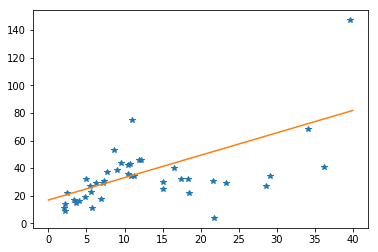

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data[:,0],data[:,1],'*')
ax1.plot(np.array([0,40]),np.array([py1,pyn]), '-')
plt.show()

In [7]:
x_input = np.linspace(-1,1,100)
y_input = x_input * 3 + np.random.rand(x_input.shape[0])*0.5

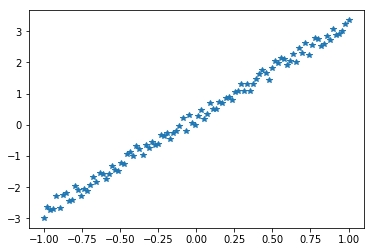

In [10]:
fig = plt.figure()
f = fig.add_subplot(111)
f.plot(x_input,y_input,'*')
plt.show()

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        loss_value = 0
        sess.run(optimizer, feed_dict={X:x_input,Y:y_input})
    w_value,b_value = sess.run([w, b])
print('w:' + str(w_value) + ' b:' + str(b_value))

w:3.02201 b:0.241595


In [21]:
global_step = tf.Variable(0,trainable=False,dtype=tf.int32)

In [22]:
learning_rate=0.01 * 0.99 ** tf.cast(global_step,tf.float32)

In [23]:
increment_step = global_step.assign_add(1)

<tf.Tensor 'mul_1:0' shape=() dtype=float32>

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate) # learning rate can be a tensor

In [26]:
optimizer = GradientDescentOptimizer(learning_rate=0.1)

NameError: name 'GradientDescentOptimizer' is not defined

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data 
MNIST = input_data.read_data_sets("/Users/huzuoliang/Desktop/train_set/mnist", one_hot=True)